# Assignment 1

## Euler Method

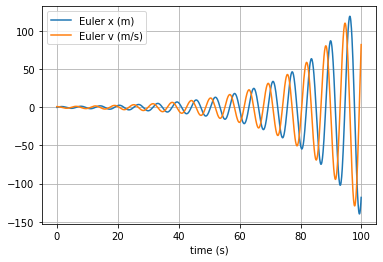

In [46]:
# uncomment the next line if running in a notebook
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# mass, spring constant, initial position and velocity
m = 1
k = 1
x = 0
v = 1

# simulation time, timestep and time
t_max = 100
dt = 0.1
t_array = np.arange(0, t_max, dt)

# initialise empty lists to record trajectories
x_list = []
v_list = []

# Euler integration
for t in t_array:

    # append current state to trajectories
    x_list.append(x)
    v_list.append(v)

    # calculate new position and velocity
    a = -k * x / m
    x = x + dt * v
    v = v + dt * a

# convert trajectory lists into arrays, so they can be sliced (useful for Assignment 2)
x1_array = np.array(x_list)
v1_array = np.array(v_list)

# plot the position-time graph
plt.figure(1)
plt.clf()
plt.xlabel('time (s)')
plt.grid()
plt.plot(t_array, x1_array, label='Euler x (m)')
plt.plot(t_array, v1_array, label='Euler v (m/s)')
plt.legend()
plt.show()

## Verlet Method

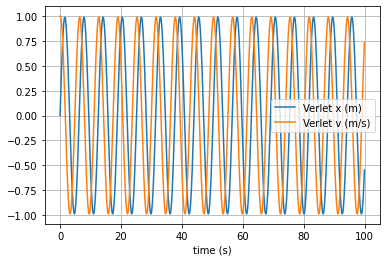

In [49]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# mass, spring constant, initial position and velocity
m = 1
k = 1
x = 0
v = 1

# simulation time, timestep and time
t_max = 100
dt = 0.1
t_array = np.arange(0, t_max, dt)

# initialise empty lists to record trajectories
x_list = []
v_list = []

# Euler integration for inital 2 as assuming initial conditions may be inaccurate
for t in range(2):

    # append current state to trajectories
    x_list.append(x)
    v_list.append(v)

    # calculate new position and velocity
    a = -k * x / m
    x = x + dt * v
    v = v + dt * a

# Verlet integration for the remaining 
for t in range(2, len(t_array)):
    
    # calculate new position and velocity
    a = -k * x / m
    x = 2 * x_list[t-1] - x_list[t-2] + (dt)**2*a 
    v = (x_list[t-1] - x_list[t-2]) / dt

    # append current state to trajectories 
    x_list.append(x)
    v_list.append(v)

# convert trajectory lists into arrays, so they can be sliced (useful for Assignment 2)
x2_array = np.array(x_list)
v2_array = np.array(v_list)

# plot the position-time graph
plt.figure(1)
plt.clf()
plt.xlabel('time (s)')
plt.grid()
plt.plot(t_array, x2_array, label='Verlet x (m)')
plt.plot(t_array, v2_array, label='Verlet v (m/s)')
plt.legend()
plt.show()

## Analytical solution

$$x = v_0\sqrt{\frac{m}{k}}\sin{\sqrt{\frac{k}{m}t}}$$
$$v = v_0\cos{\sqrt{\frac{k}{m}t}}$$

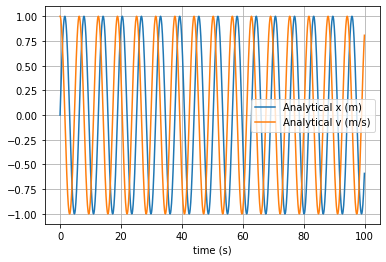

In [50]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# mass, spring constant, initial position and velocity
m = 1
k = 1
x = 0
v = 1

# simulation time, timestep and time
t_max = 100
dt = 0.1
t_array = np.arange(0, t_max, dt)

# analytical solution
x0_array = v*np.sqrt(m/k)*np.sin(np.sqrt(k/m)*t_array)
v0_array = v*np.cos(np.sqrt(k/m)*t_array)

# plot the position-time graph
plt.figure(1)
plt.clf()
plt.xlabel('time (s)')
plt.grid()
plt.plot(t_array, x0_array, label='Analytical x (m)')
plt.plot(t_array, v0_array, label='Analytical v (m/s)')
plt.legend()
plt.show()

By trial and error, the Verlet method becomes unstable when dt>=2, ie the critical value of dt is 2.

# Assignment 2

## Straight down descent

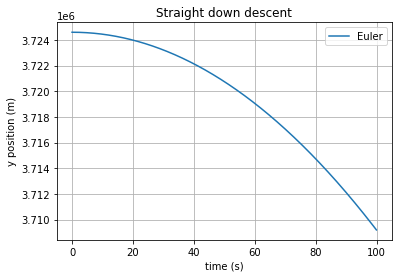

In [92]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# constants, initial position and velocity
G = 6.67e-11
M = 6.42e23
m = 1
R = 3386000
position = np.array([0,R*1.1,0])
velocity = np.array([0,0,0])

# simulation time, timestep and time
t_max = 100
dt = 0.1
t_array = np.arange(0, t_max, dt)

# initialise empty lists to record trajectories
position_list = []
velocity_list = []

# Euler integration for inital 2 as assuming initial conditions may be inaccurate
for t in range(len(t_array)):

    # append current state to trajectories
    position_list.append(position)
    velocity_list.append(velocity)

    # calculate new position and velocity
    r = np.sqrt(position[0]**2+position[1]**2+position[2]**2)
    a = -G * M * m * position / r**3
    position = position + dt * velocity
    velocity = velocity + dt * a

# convert trajectory lists into arrays, so they can be sliced (useful for Assignment 2)
position_array = np.array(position_list)
velocity_array = np.array(velocity_list)

x_array = position_array[:,0]
y_array = position_array[:,1]

# plot the position-time graph
plt.figure(1)
plt.clf()
plt.ylabel("y position (m)")
plt.xlabel('time (s)')
plt.grid()
plt.plot(t_array, y_array, label='Euler')
plt.legend()
plt.title("Straight down descent")
plt.show()

## Circular orbit

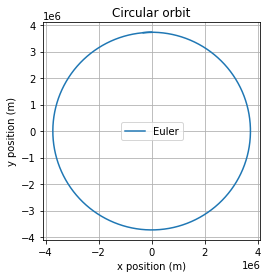

In [94]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# constants, initial position and velocity
G = 6.67e-11
M = 6.42e23
m = 1
R = 3386000 #Radius of Mars
position = np.array([0,R*1.1,0])
velocity = np.array([-np.sqrt(G*M/(R*1.1)),0,0])

# simulation time, timestep and time
t_max = 7000
dt = 0.1
t_array = np.arange(0, t_max, dt)

# initialise empty lists to record trajectories
position_list = []
velocity_list = []

# Euler integration for inital 2 as assuming initial conditions may be inaccurate
for t in range(len(t_array)):

    # append current state to trajectories
    position_list.append(position)
    velocity_list.append(velocity)

    # calculate new position and velocity
    r = np.sqrt(position[0]**2+position[1]**2+position[2]**2)
    a = -G * M * m * position / r**3
    position = position + dt * velocity
    velocity = velocity + dt * a

# convert trajectory lists into arrays, so they can be sliced (useful for Assignment 2)
position_array = np.array(position_list)
velocity_array = np.array(velocity_list)

x_array = position_array[:,0]
y_array = position_array[:,1]

# plot the position-time graph
plt.figure(1)
plt.clf()
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.grid()
plt.plot(x_array, y_array, label='Euler')
plt.legend()
plt.title("Circular orbit")
plt.gca().set_aspect('equal', adjustable='box') #Equal axis so it does not look distorted
plt.show()

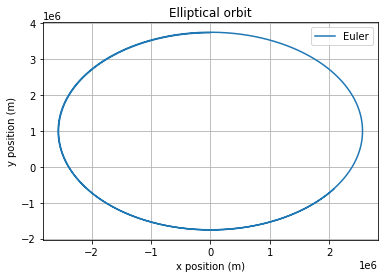

In [109]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# constants, initial position and velocity
G = 6.67e-11
M = 6.42e23
m = 1
R = 3386000 #Radius of Mars
position = np.array([0,R*1.1,0])
velocity = np.array([-0.8*np.sqrt(G*M/(R*1.1)),0,0])

# simulation time, timestep and time
t_max = 7000
dt = 0.1
t_array = np.arange(0, t_max, dt)

# initialise empty lists to record trajectories
position_list = []
velocity_list = []

# Euler integration for inital 2 as assuming initial conditions may be inaccurate
for t in range(len(t_array)):

    # append current state to trajectories
    position_list.append(position)
    velocity_list.append(velocity)

    # calculate new position and velocity
    r = np.sqrt(position[0]**2+position[1]**2+position[2]**2)
    a = -G * M * m * position / r**3
    position = position + dt * velocity
    velocity = velocity + dt * a

# convert trajectory lists into arrays, so they can be sliced (useful for Assignment 2)
position_array = np.array(position_list)
velocity_array = np.array(velocity_list)

x_array = position_array[:,0]
y_array = position_array[:,1]

# plot the position-time graph
plt.figure(1)
plt.clf()
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.grid()
plt.plot(x_array, y_array, label='Euler')
plt.legend()
plt.title("Elliptical orbit")
plt.show()

## Hyperbolic orbit

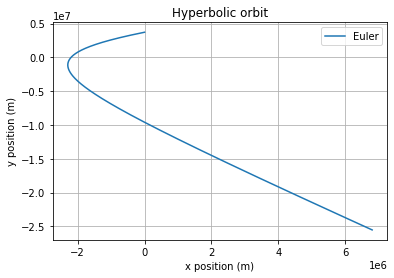

In [115]:
# uncomment the next line if running in a notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# constants, initial position and velocity
G = 6.67e-11
M = 6.42e23
m = 1
R = 3386000 #Radius of Mars
position = np.array([0,R*1.1,0])
velocity = np.array([-1.2*np.sqrt(G*M/(R*1.1)),-1.2*np.sqrt(G*M/(R*1.1)),0])

# simulation time, timestep and time
t_max = 7000
dt = 0.1
t_array = np.arange(0, t_max, dt)

# initialise empty lists to record trajectories
position_list = []
velocity_list = []

# Euler integration for inital 2 as assuming initial conditions may be inaccurate
for t in range(len(t_array)):

    # append current state to trajectories
    position_list.append(position)
    velocity_list.append(velocity)

    # calculate new position and velocity
    r = np.sqrt(position[0]**2+position[1]**2+position[2]**2)
    a = -G * M * m * position / r**3
    position = position + dt * velocity
    velocity = velocity + dt * a

# convert trajectory lists into arrays, so they can be sliced (useful for Assignment 2)
position_array = np.array(position_list)
velocity_array = np.array(velocity_list)

x_array = position_array[:,0]
y_array = position_array[:,1]

# plot the position-time graph
plt.figure(1)
plt.clf()
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.grid()
plt.plot(x_array, y_array, label='Euler')
plt.legend()
plt.title("Hyperbolic orbit")
plt.show()